In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
url = 'https://raw.githubusercontent.com/SumantaSethi/Bank-Customer-Churn-Prediction/main/Churn_Modelling.csv'
df = pd.read_csv(url)

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!

Dataset shape: (10000, 14)
Number of rows: 10000
Number of columns: 14


In [3]:
# Display first few rows
print("\n" + "="*80)
print("FIRST 5 ROWS OF THE DATASET")
print("="*80)
print(df.head())

# Display last few rows
print("\n" + "="*80)
print("LAST 5 ROWS OF THE DATASET")
print("="*80)
print(df.tail())

# Display column information
print("\n" + "="*80)
print("DATASET INFORMATION")
print("="*80)
print(df.info())

# Display statistical summary
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
print(df.describe())


FIRST 5 ROWS OF THE DATASET
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         938

In [4]:
print("\n" + "="*80)
print("DATA QUALITY CHECKS")
print("="*80)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check data types
print("\nData Types:")
print(df.dtypes)


DATA QUALITY CHECKS

Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Number of duplicate rows: 0

Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


# UNDERSTAND EACH COLUMN

In [5]:
print("COLUMN DESCRIPTIONS")

column_descriptions = {
    'RowNumber': 'Sequential row number (1-10000) - Not useful for prediction',
    'CustomerId': 'Unique customer identifier - Not useful for prediction',
    'Surname': 'Customer last name - Not useful for prediction',
    'CreditScore': 'Credit score (300-850) - PREDICTIVE FEATURE',
    'Geography': 'Country (France/Germany/Spain) - PREDICTIVE FEATURE',
    'Gender': 'Gender (Male/Female) - PREDICTIVE FEATURE',
    'Age': 'Customer age in years - PREDICTIVE FEATURE',
    'Tenure': 'Years as bank customer (0-10) - PREDICTIVE FEATURE',
    'Balance': 'Account balance - PREDICTIVE FEATURE',
    'NumOfProducts': 'Number of bank products (1-4) - PREDICTIVE FEATURE',
    'HasCrCard': 'Has credit card (0=No, 1=Yes) - PREDICTIVE FEATURE',
    'IsActiveMember': 'Active member (0=No, 1=Yes) - PREDICTIVE FEATURE',
    'EstimatedSalary': 'Estimated annual salary - PREDICTIVE FEATURE',
    'Exited': 'Customer churned (0=No, 1=Yes) - TARGET VARIABLE'
}

for col, desc in column_descriptions.items():
    print(f"{col:20s}: {desc}")

COLUMN DESCRIPTIONS
RowNumber           : Sequential row number (1-10000) - Not useful for prediction
CustomerId          : Unique customer identifier - Not useful for prediction
Surname             : Customer last name - Not useful for prediction
CreditScore         : Credit score (300-850) - PREDICTIVE FEATURE
Geography           : Country (France/Germany/Spain) - PREDICTIVE FEATURE
Gender              : Gender (Male/Female) - PREDICTIVE FEATURE
Age                 : Customer age in years - PREDICTIVE FEATURE
Tenure              : Years as bank customer (0-10) - PREDICTIVE FEATURE
Balance             : Account balance - PREDICTIVE FEATURE
NumOfProducts       : Number of bank products (1-4) - PREDICTIVE FEATURE
HasCrCard           : Has credit card (0=No, 1=Yes) - PREDICTIVE FEATURE
IsActiveMember      : Active member (0=No, 1=Yes) - PREDICTIVE FEATURE
EstimatedSalary     : Estimated annual salary - PREDICTIVE FEATURE
Exited              : Customer churned (0=No, 1=Yes) - TARGET VARIA

# UNIQUE VALUES IN EACH COLUMN

In [6]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col:20s}: {unique_count:6d} unique values")

    # For categorical columns, show the unique values
    if unique_count < 20:
        print(f"{'':20s}  Values: {sorted(df[col].unique())}")

RowNumber           :  10000 unique values
CustomerId          :  10000 unique values
Surname             :   2932 unique values
CreditScore         :    460 unique values
Geography           :      3 unique values
                      Values: ['France', 'Germany', 'Spain']
Gender              :      2 unique values
                      Values: ['Female', 'Male']
Age                 :     70 unique values
Tenure              :     11 unique values
                      Values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Balance             :   6382 unique values
NumOfProducts       :      4 unique values
                      Values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
HasCrCard           :      2 unique values
                      Values: [np.int64(0), np.int64(1)]
IsActiveMember      :      2 unique values
                      Values: [np.int64(0), np.int64(1)]
Es

# DATA CLEANING PROCESS

In [7]:
df_clean = df.copy()

# Remove non-predictive columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
print(f"\nDropping columns: {columns_to_drop}")

df_clean = df_clean.drop(columns=columns_to_drop)

print(f"\nShape after removing non-predictive columns: {df_clean.shape}")
print(f"Remaining columns: {list(df_clean.columns)}")


Dropping columns: ['RowNumber', 'CustomerId', 'Surname']

Shape after removing non-predictive columns: (10000, 11)
Remaining columns: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


# CLEANED DATASET SUMMARY

In [8]:
print("\nFirst 5 rows of cleaned data:")
print(df_clean.head())

print("\nCleaned dataset info:")
print(df_clean.info())

print("\nFinal missing value check:")
print(df_clean.isnull().sum())


First 5 rows of cleaned data:
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  

# SAVE CLEANED DATA

In [11]:
import os

# Define the directory path
output_dir = 'Resources'

# Create the directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Save cleaned data for future use
df_clean.to_csv(f'{output_dir}/Churn_Modelling_Clean.csv', index=False)
print("\n" + "="*80)
print(f"Cleaned data saved to '{output_dir}/Churn_Modelling_Clean.csv'")
print("="*80)


Cleaned data saved to 'Resources/Churn_Modelling_Clean.csv'


In [12]:
print("FINAL DATASET STATISTICS")
print("="*80)

print(f"\nTotal records: {len(df_clean)}")
print(f"Total features: {len(df_clean.columns) - 1}")  # Excluding target
print(f"Target variable: Exited")

print("\nFeature types:")
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()

# Remove target from numerical features
if 'Exited' in numerical_features:
    numerical_features.remove('Exited')

    print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
    print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

    print("\n" + "="*80)
    print("DATA CLEANING COMPLETED SUCCESSFULLY!")
    print("="*80)

FINAL DATASET STATISTICS

Total records: 10000
Total features: 10
Target variable: Exited

Feature types:
Numerical features (8): ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical features (2): ['Geography', 'Gender']

DATA CLEANING COMPLETED SUCCESSFULLY!


# EDA Part 2 Data Analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load cleaned data
df = pd.read_csv('Resources/Churn_Modelling_Clean.csv')

## TARGET VARIABLE ANALYSIS


Churn Distribution:
Stayed (0): 7963 customers (79.63%)
Churned (1): 2037 customers (20.37%)


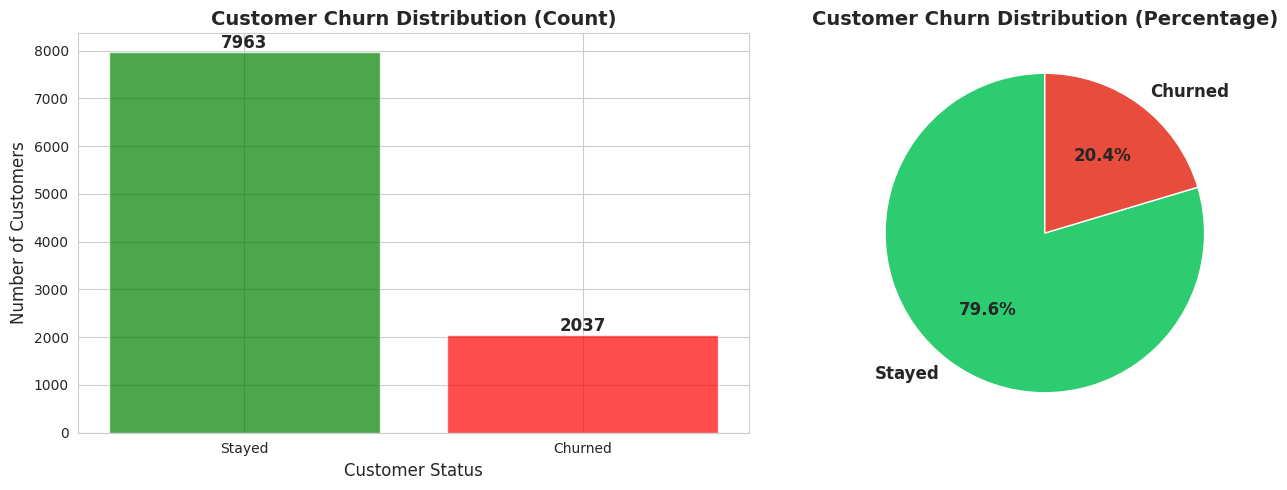


⚠️ OBSERVATION: Dataset is IMBALANCED
   - Majority class (Stayed): 79.6%
   - Minority class (Churned): 20.4%
   - This requires SMOTE or other balancing techniques


In [14]:
churn_counts = df['Exited'].value_counts()
churn_percentages = df['Exited'].value_counts(normalize=True) * 100

print("\nChurn Distribution:")
print(f"Stayed (0): {churn_counts[0]} customers ({churn_percentages[0]:.2f}%)")
print(f"Churned (1): {churn_counts[1]} customers ({churn_percentages[1]:.2f}%)")

# Visualization 1: Churn Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Stayed', 'Churned'], churn_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Customer Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_xlabel('Customer Status', fontsize=12)
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', fontsize=12, fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts.values, labels=['Stayed', 'Churned'], autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Customer Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('Resources/01_churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n⚠️ OBSERVATION: Dataset is IMBALANCED")
print(f"   - Majority class (Stayed): {churn_percentages[0]:.1f}%")
print(f"   - Minority class (Churned): {churn_percentages[1]:.1f}%")
print("   - This requires SMOTE or other balancing techniques")

# GENDER ANALYSIS


Gender Distribution:
Gender
Male      5457
Female    4543
Name: count, dtype: int64

Churn Rate by Gender:
Exited          0          1
Gender                      
Female  74.928461  25.071539
Male    83.544072  16.455928

Churn Count by Gender:
Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


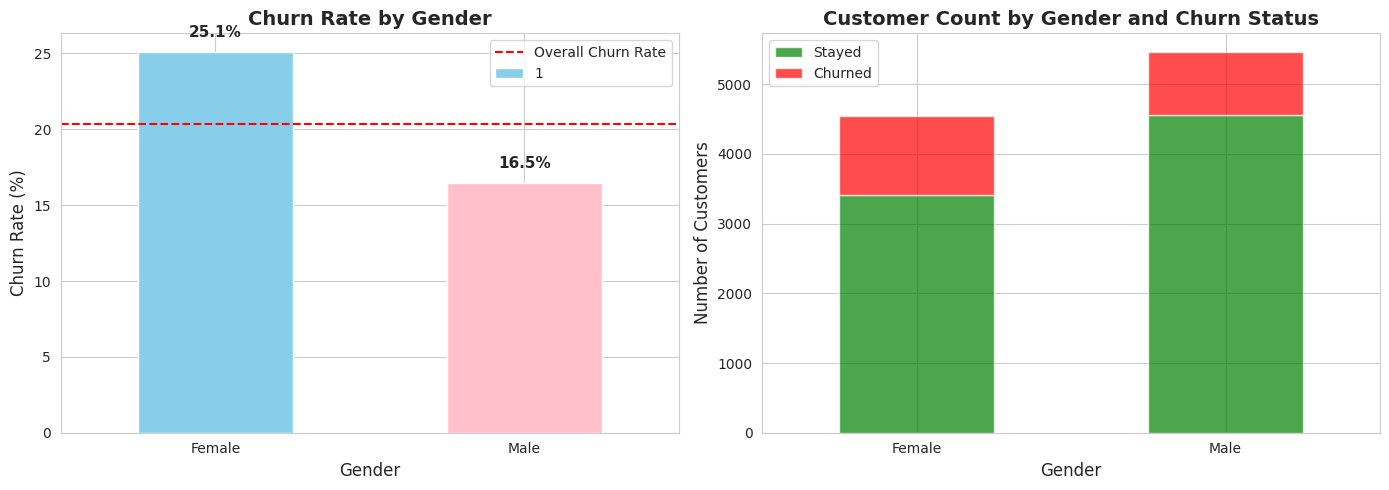


⚠️ KEY FINDING:
   - Female churn rate: 25.07%
   - Male churn rate: 16.46%
   - Female customers are 52.4% more likely to churn


In [15]:
gender_dist = df['Gender'].value_counts()
print(f"\nGender Distribution:")
print(gender_dist)

# Churn by gender
gender_churn = pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100
gender_churn_counts = pd.crosstab(df['Gender'], df['Exited'])

print("\nChurn Rate by Gender:")
print(gender_churn)

print("\nChurn Count by Gender:")
print(gender_churn_counts)

# Visualization 2: Gender Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate by gender
gender_churn[1].plot(kind='bar', ax=axes[0], color=['skyblue', 'pink'])
axes[0].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_xticklabels(['Female', 'Male'], rotation=0)
axes[0].axhline(y=churn_percentages[1], color='red', linestyle='--', label='Overall Churn Rate')
axes[0].legend()

for i, v in enumerate(gender_churn[1].values):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Stacked bar chart
gender_churn_counts.plot(kind='bar', stacked=True, ax=axes[1],
                         color=['green', 'red'], alpha=0.7)
axes[1].set_title('Customer Count by Gender and Churn Status', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1].legend(['Stayed', 'Churned'])

plt.tight_layout()
plt.savefig('Resources/02_gender_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

female_churn = gender_churn.loc['Female', 1]
male_churn = gender_churn.loc['Male', 1]
diff_percentage = ((female_churn - male_churn) / male_churn) * 100

print(f"\n⚠️ KEY FINDING:")
print(f"   - Female churn rate: {female_churn:.2f}%")
print(f"   - Male churn rate: {male_churn:.2f}%")
print(f"   - Female customers are {diff_percentage:.1f}% more likely to churn")

# GEOGRAPHY ANALYSIS


Customer Distribution by Country:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Churn Rate by Country:
Exited             0          1
Geography                      
France     83.845233  16.154767
Germany    67.556796  32.443204
Spain      83.326605  16.673395

Churn Count by Country:
Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


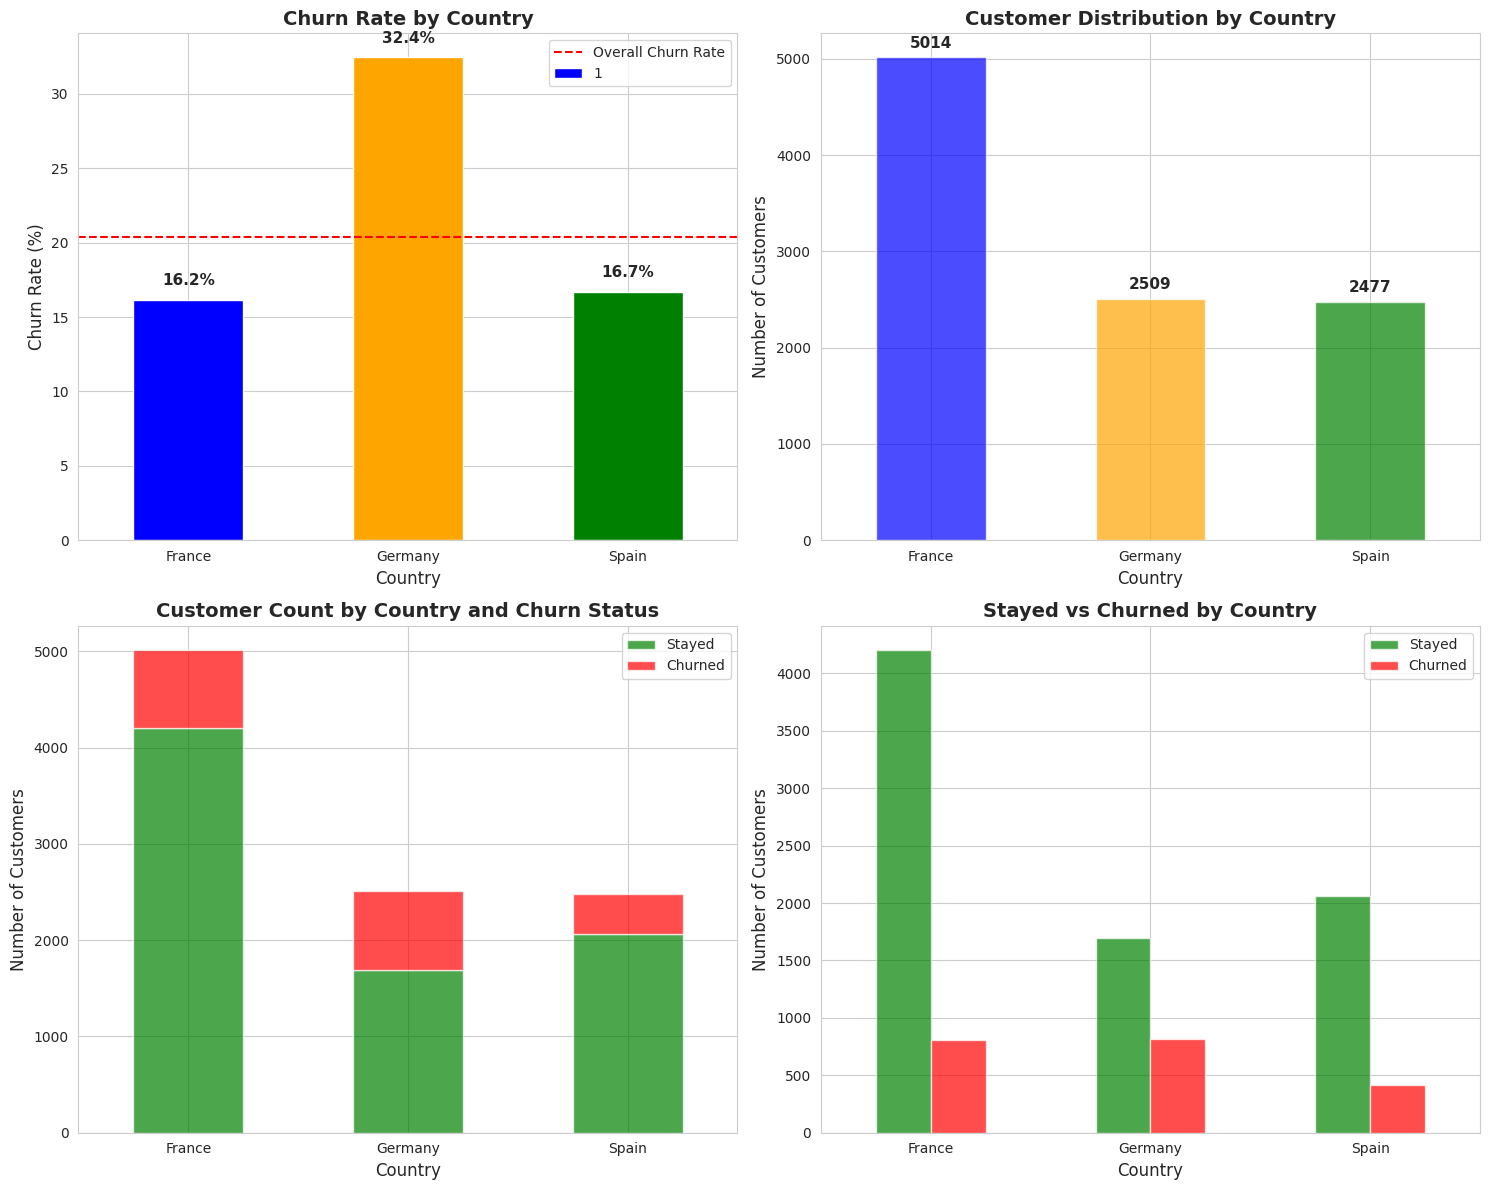


⚠️ KEY FINDING:
   - France: 16.15% churn rate (5014 customers)
   - Germany: 32.44% churn rate (2509 customers)
   - Spain: 16.67% churn rate (2477 customers)

   - German customers have 2.01x higher churn rate than French


In [16]:
geo_dist = df['Geography'].value_counts()
print(f"\nCustomer Distribution by Country:")
print(geo_dist)

# Churn by geography
geo_churn = pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100
geo_churn_counts = pd.crosstab(df['Geography'], df['Exited'])

print("\nChurn Rate by Country:")
print(geo_churn)

print("\nChurn Count by Country:")
print(geo_churn_counts)

# Visualization 3: Geography Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Churn rate by country
geo_churn[1].plot(kind='bar', ax=axes[0, 0], color=['blue', 'orange', 'green'])
axes[0, 0].set_title('Churn Rate by Country', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0, 0].set_xlabel('Country', fontsize=12)
axes[0, 0].set_xticklabels(geo_churn.index, rotation=0)
axes[0, 0].axhline(y=churn_percentages[1], color='red', linestyle='--', label='Overall Churn Rate')
axes[0, 0].legend()

for i, v in enumerate(geo_churn[1].values):
    axes[0, 0].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Customer distribution by country
geo_dist.plot(kind='bar', ax=axes[0, 1], color=['blue', 'orange', 'green'], alpha=0.7)
axes[0, 1].set_title('Customer Distribution by Country', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Number of Customers', fontsize=12)
axes[0, 1].set_xlabel('Country', fontsize=12)
axes[0, 1].set_xticklabels(geo_dist.index, rotation=0)

for i, v in enumerate(geo_dist.values):
    axes[0, 1].text(i, v + 100, str(v), ha='center', fontsize=11, fontweight='bold')

# Stacked bar chart
geo_churn_counts.plot(kind='bar', stacked=True, ax=axes[1, 0],
                      color=['green', 'red'], alpha=0.7)
axes[1, 0].set_title('Customer Count by Country and Churn Status', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Number of Customers', fontsize=12)
axes[1, 0].set_xlabel('Country', fontsize=12)
axes[1, 0].set_xticklabels(geo_churn_counts.index, rotation=0)
axes[1, 0].legend(['Stayed', 'Churned'])

# Grouped bar chart
geo_churn_counts.plot(kind='bar', ax=axes[1, 1], color=['green', 'red'], alpha=0.7)
axes[1, 1].set_title('Stayed vs Churned by Country', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Customers', fontsize=12)
axes[1, 1].set_xlabel('Country', fontsize=12)
axes[1, 1].set_xticklabels(geo_churn_counts.index, rotation=0)
axes[1, 1].legend(['Stayed', 'Churned'])

plt.tight_layout()
plt.savefig('Resources/03_geography_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n⚠️ KEY FINDING:")
for country in geo_churn.index:
    print(f"   - {country}: {geo_churn.loc[country, 1]:.2f}% churn rate "
          f"({geo_dist[country]} customers)")

germany_churn = geo_churn.loc['Germany', 1]
france_churn = geo_churn.loc['France', 1]
print(f"\n   - German customers have {(germany_churn/france_churn):.2f}x higher churn rate than French")

# AGE ANALYSIS


Age Statistics:
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0


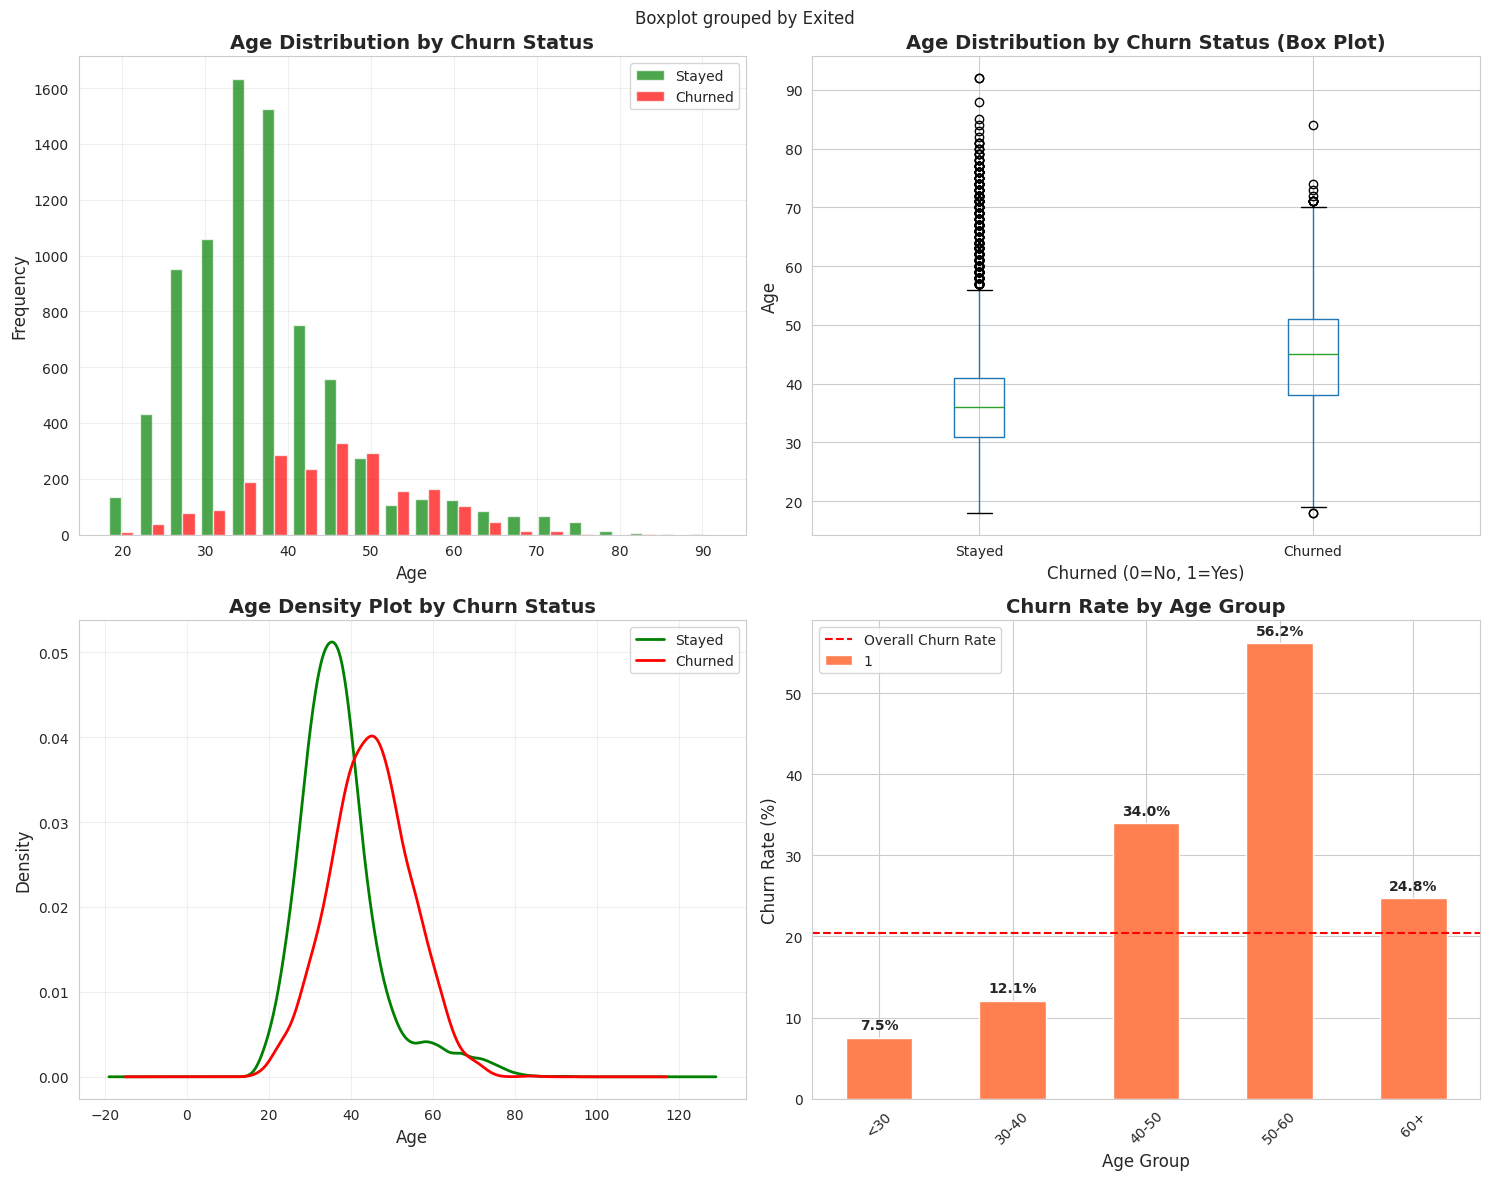


⚠️ KEY FINDING:
   - Average age of churned customers: 44.8 years
   - Average age of stayed customers: 37.4 years
   - Older customers (45+) show significantly higher churn rates

EXPLORATORY DATA ANALYSIS PART 2 COMPLETED!


In [18]:
print("\nAge Statistics:")
print(df.groupby('Exited')['Age'].describe())

# Visualization 4: Age Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution by churn status
churned = df[df['Exited'] == 1]
stayed = df[df['Exited'] == 0]

axes[0, 0].hist([stayed['Age'], churned['Age']], bins=20, label=['Stayed', 'Churned'],
                color=['green', 'red'], alpha=0.7)
axes[0, 0].set_title('Age Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot
df.boxplot(column='Age', by='Exited', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Churn Status (Box Plot)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Churned (0=No, 1=Yes)', fontsize=12)
axes[0, 1].set_ylabel('Age', fontsize=12)
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['Stayed', 'Churned'])

# KDE plot
stayed['Age'].plot(kind='kde', ax=axes[1, 0], label='Stayed', color='green', linewidth=2)
churned['Age'].plot(kind='kde', ax=axes[1, 0], label='Churned', color='red', linewidth=2)
axes[1, 0].set_title('Age Density Plot by Churn Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Age', fontsize=12)
axes[1, 0].set_ylabel('Density', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Age groups churn rate
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_group_churn = pd.crosstab(df['AgeGroup'], df['Exited'], normalize='index') * 100
age_group_churn[1].plot(kind='bar', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Churn Rate by Age Group', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1, 1].set_xlabel('Age Group', fontsize=12)
axes[1, 1].set_xticklabels(age_labels, rotation=45)
axes[1, 1].axhline(y=churn_percentages[1], color='red', linestyle='--', label='Overall Churn Rate')
axes[1, 1].legend()

for i, v in enumerate(age_group_churn[1].values):
    axes[1, 1].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Resources/04_age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n⚠️ KEY FINDING:")
print(f"   - Average age of churned customers: {churned['Age'].mean():.1f} years")
print(f"   - Average age of stayed customers: {stayed['Age'].mean():.1f} years")
print(f"   - Older customers (45+) show significantly higher churn rates")

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS PART 2 COMPLETED!")
print("="*80)

# 3.Feature Analysis and Correlations

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load cleaned data
df = pd.read_csv('Resources/Churn_Modelling_Clean.csv')

# 3.1Balance Analysis


Balance Statistics:
         count          mean           std  min       25%        50%  \
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09  


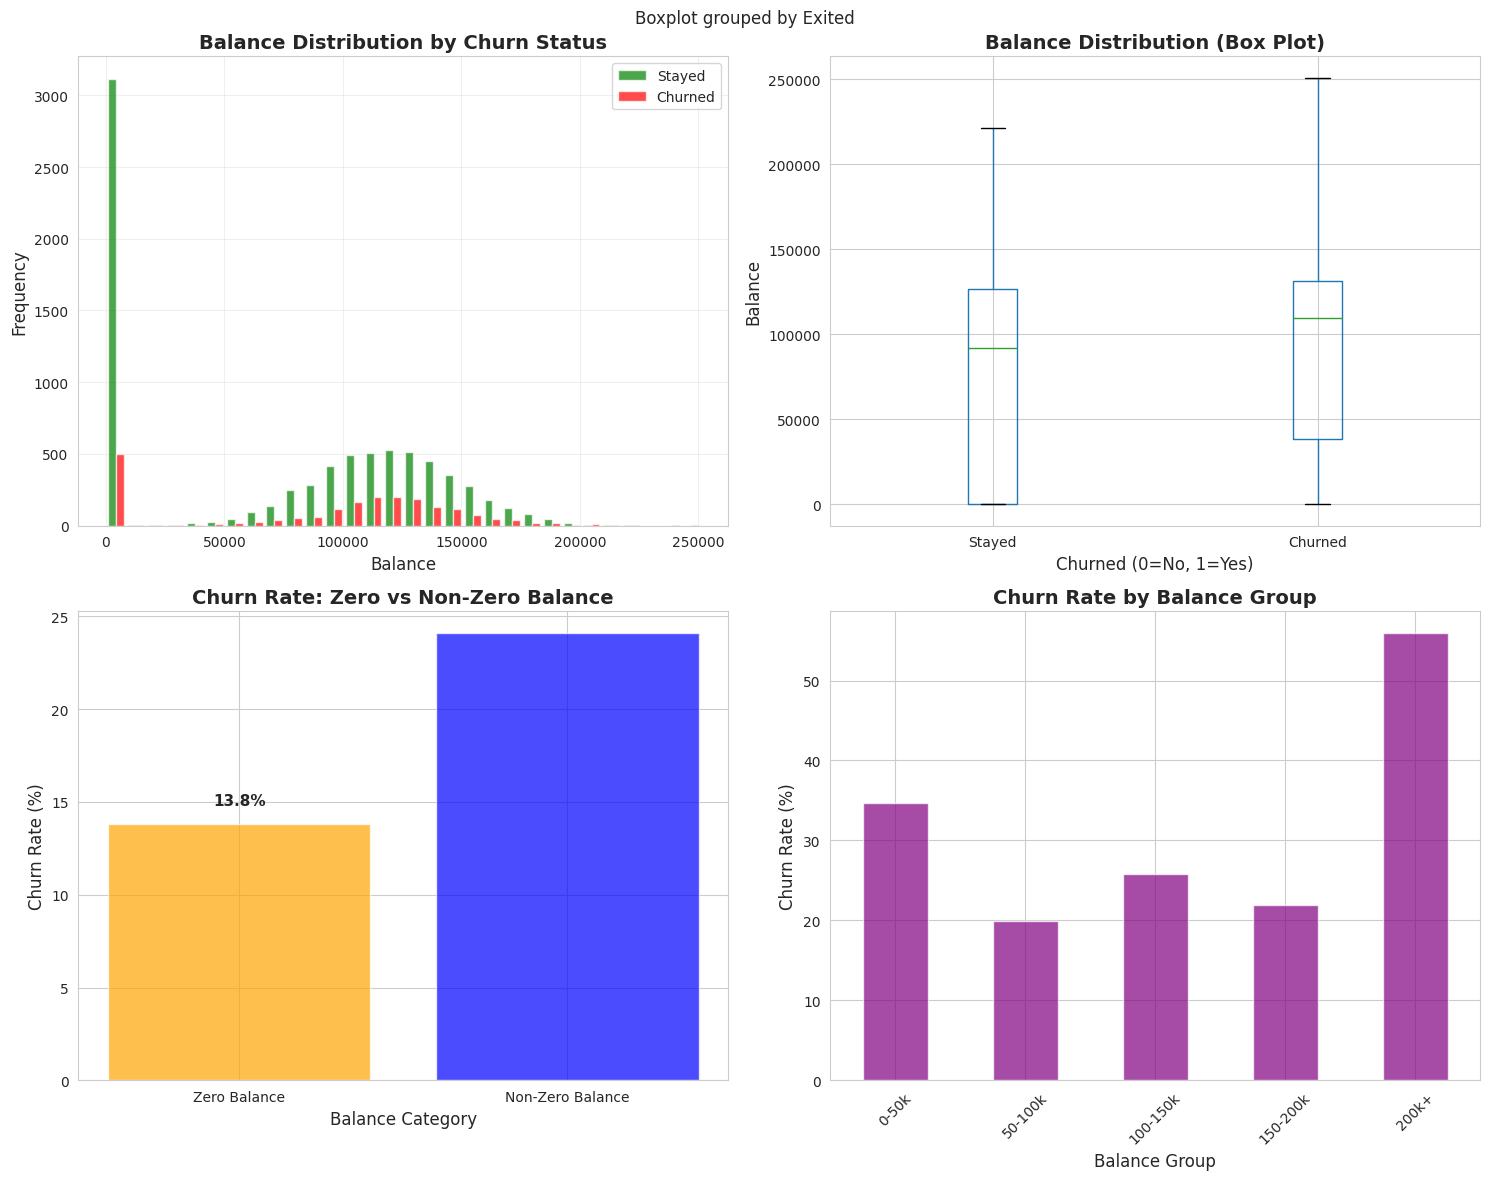


⚠️ KEY FINDING:
   - Customers with zero balance churn at: 13.82%
   - Customers with non-zero balance churn at: 24.08%


<Figure size 1200x600 with 0 Axes>


⚠️ KEY FINDING:
   - Customers with zero balance churn at: 13.82%
   - Customers with non-zero balance churn at: 24.08%


In [22]:
churned = df[df['Exited'] == 1]
stayed = df[df['Exited'] == 0]

print("\nBalance Statistics:")
print(df.groupby('Exited')['Balance'].describe())

# Visualization 5: Balance Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0, 0].hist([stayed['Balance'], churned['Balance']], bins=30,
                label=['Stayed', 'Churned'], color=['green', 'red'], alpha=0.7)
axes[0, 0].set_title('Balance Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Balance', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot
df.boxplot(column='Balance', by='Exited', ax=axes[0, 1])
axes[0, 1].set_title('Balance Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Churned (0=No, 1=Yes)', fontsize=12)
axes[0, 1].set_ylabel('Balance', fontsize=12)
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['Stayed', 'Churned'])

# Zero balance analysis
zero_balance = df[df['Balance'] == 0]
non_zero_balance = df[df['Balance'] > 0]

zero_churn = zero_balance['Exited'].value_counts(normalize=True) * 100
non_zero_churn = non_zero_balance['Exited'].value_counts(normalize=True) * 100

balance_categories = ['Zero Balance', 'Non-Zero Balance']
churn_rates = [zero_churn[1], non_zero_churn[1]]

axes[1, 0].bar(balance_categories, churn_rates, color=['orange', 'blue'], alpha=0.7)
axes[1, 0].set_title('Churn Rate: Zero vs Non-Zero Balance', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1, 0].set_xlabel('Balance Category', fontsize=12)

for i, v in enumerate(churn_rates):
    axes[1, 0].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=11, fontweight='bold')

    # Balance groups
    balance_bins = [0, 50000, 100000, 150000, 200000, 300000]
    balance_labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200k+']
    df['BalanceGroup'] = pd.cut(df['Balance'], bins=balance_bins, labels=balance_labels)

    balance_churn = pd.crosstab(df['BalanceGroup'], df['Exited'], normalize='index') * 100
    balance_churn[1].plot(kind='bar', ax=axes[1, 1], color='purple', alpha=0.7)
    axes[1, 1].set_title('Churn Rate by Balance Group', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Churn Rate (%)', fontsize=12)
    axes[1, 1].set_xlabel('Balance Group', fontsize=12)
    axes[1, 1].set_xticklabels(balance_labels, rotation=45)

    plt.tight_layout()
    plt.savefig('Resources/05_balance_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n⚠️ KEY FINDING:")
    print(f"   - Customers with zero balance churn at: {zero_churn[1]:.2f}%")
    print(f"   - Customers with non-zero balance churn at: {non_zero_churn[1]:.2f}%")

# 3.2 TENURE ANALYSIS

         count      mean       std  min  25%  50%  75%   max
Exited                                                      
0       7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0


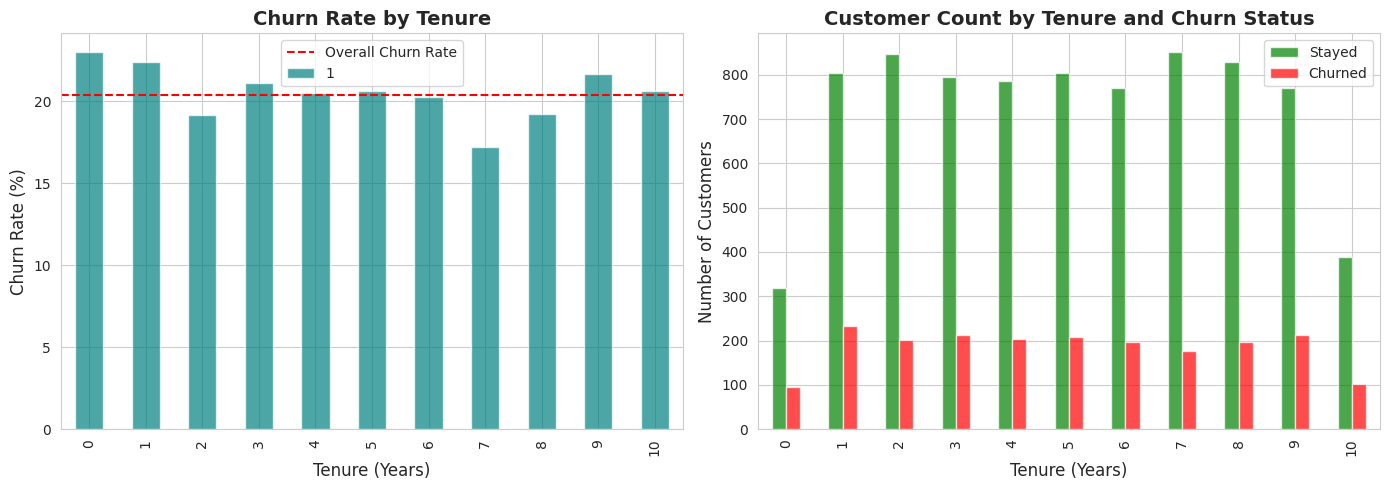


⚠️ KEY FINDING:
   - Tenure doesn't show strong correlation with churn
   - Churn is relatively consistent across all tenure levels


In [24]:
print(df.groupby('Exited')['Tenure'].describe())

# Visualization 6: Tenure Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate by tenure
tenure_churn = pd.crosstab(df['Tenure'], df['Exited'], normalize='index') * 100
tenure_churn[1].plot(kind='bar', ax=axes[0], color='teal', alpha=0.7)
axes[0].set_title('Churn Rate by Tenure', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].set_xlabel('Tenure (Years)', fontsize=12)
axes[0].axhline(y=df['Exited'].mean()*100, color='red', linestyle='--',
                label='Overall Churn Rate')
axes[0].legend()

# Count by tenure and churn
tenure_counts = pd.crosstab(df['Tenure'], df['Exited'])
tenure_counts.plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.7)
axes[1].set_title('Customer Count by Tenure and Churn Status', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_xlabel('Tenure (Years)', fontsize=12)
axes[1].legend(['Stayed', 'Churned'])

plt.tight_layout()
plt.savefig('Resources/06_tenure_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n⚠️ KEY FINDING:")
print(f"   - Tenure doesn't show strong correlation with churn")
print(f"   - Churn is relatively consistent across all tenure levels")

# 3.3 NUMBER OF PRODUCTS ANALYSIS

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


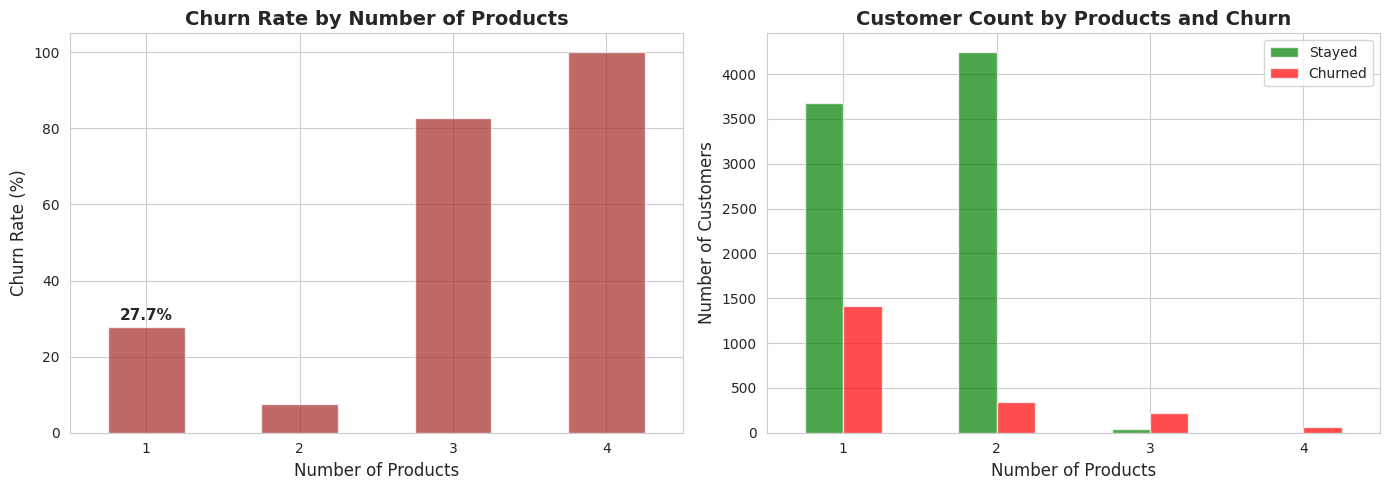


⚠️ KEY FINDING:
   - 1 product(s): 27.71% churn rate
   - 2 product(s): 7.58% churn rate
   - 3 product(s): 82.71% churn rate
   - 4 product(s): 100.00% churn rate


<Figure size 1200x600 with 0 Axes>


⚠️ KEY FINDING:
   - 1 product(s): 27.71% churn rate
   - 2 product(s): 7.58% churn rate
   - 3 product(s): 82.71% churn rate
   - 4 product(s): 100.00% churn rate


<Figure size 1200x600 with 0 Axes>


⚠️ KEY FINDING:
   - 1 product(s): 27.71% churn rate
   - 2 product(s): 7.58% churn rate
   - 3 product(s): 82.71% churn rate
   - 4 product(s): 100.00% churn rate


<Figure size 1200x600 with 0 Axes>


⚠️ KEY FINDING:
   - 1 product(s): 27.71% churn rate
   - 2 product(s): 7.58% churn rate
   - 3 product(s): 82.71% churn rate
   - 4 product(s): 100.00% churn rate


In [25]:
print(df['NumOfProducts'].value_counts().sort_index())

# Visualization 7: Products Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate by number of products
products_churn = pd.crosstab(df['NumOfProducts'], df['Exited'], normalize='index') * 100
products_churn[1].plot(kind='bar', ax=axes[0], color='brown', alpha=0.7)
axes[0].set_title('Churn Rate by Number of Products', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].set_xlabel('Number of Products', fontsize=12)
axes[0].set_xticklabels(['1', '2', '3', '4'], rotation=0)

for i, v in enumerate(products_churn[1].values):
    axes[0].text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=11, fontweight='bold')

    # Count by products
    products_counts = pd.crosstab(df['NumOfProducts'], df['Exited'])
    products_counts.plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.7)
    axes[1].set_title('Customer Count by Products and Churn', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Number of Customers', fontsize=12)
    axes[1].set_xlabel('Number of Products', fontsize=12)
    axes[1].set_xticklabels(['1', '2', '3', '4'], rotation=0)
    axes[1].legend(['Stayed', 'Churned'])

    plt.tight_layout()
    plt.savefig('Resources/07_products_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n⚠️ KEY FINDING:")
    for prod in products_churn.index:
        print(f"   - {prod} product(s): {products_churn.loc[prod, 1]:.2f}% churn rate")


# 3.4 CREDIT CARD AND ACTIVE MEMBER ANALYSIS


Churn Rate by Credit Card Ownership:
Exited             0          1
HasCrCard                      
0          79.185059  20.814941
1          79.815734  20.184266

Churn Rate by Active Member Status:
Exited                  0          1
IsActiveMember                      
0               73.149103  26.850897
1               85.730926  14.269074


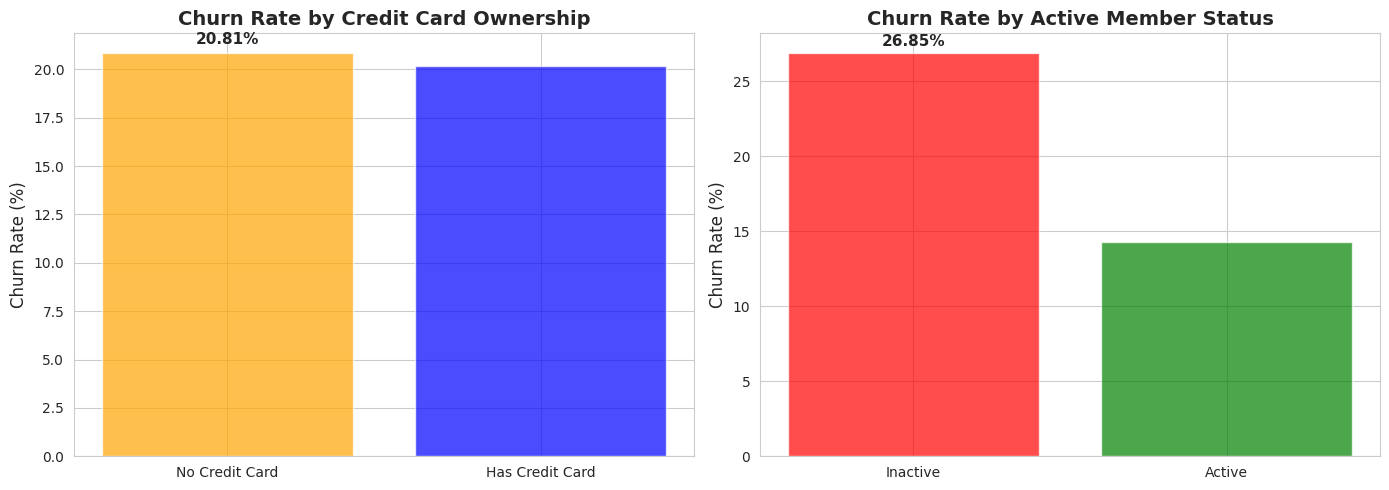


⚠️ KEY FINDINGS:
   - Active members have 14.27% churn rate
   - Inactive members have 26.85% churn rate
   - Being active reduces churn by 12.6 percentage


<Figure size 1200x600 with 0 Axes>


⚠️ KEY FINDINGS:
   - Active members have 14.27% churn rate
   - Inactive members have 26.85% churn rate
   - Being active reduces churn by 12.6 percentage


<Figure size 1200x600 with 0 Axes>


⚠️ KEY FINDINGS:
   - Active members have 14.27% churn rate
   - Inactive members have 26.85% churn rate
   - Being active reduces churn by 12.6 percentage


<Figure size 1200x600 with 0 Axes>


⚠️ KEY FINDINGS:
   - Active members have 14.27% churn rate
   - Inactive members have 26.85% churn rate
   - Being active reduces churn by 12.6 percentage


In [27]:
cc_churn = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index') * 100
print("\nChurn Rate by Credit Card Ownership:")
print(cc_churn)

# Active Member analysis
active_churn = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index') * 100
print("\nChurn Rate by Active Member Status:")
print(active_churn)

# Visualization 8
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Credit Card
cc_labels = ['No Credit Card', 'Has Credit Card']
cc_values = [cc_churn.loc[0, 1], cc_churn.loc[1, 1]]
axes[0].bar(cc_labels, cc_values, color=['orange', 'blue'], alpha=0.7)
axes[0].set_title('Churn Rate by Credit Card Ownership', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)

for i, v in enumerate(cc_values):
    axes[0].text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

    # Active Member
    active_labels = ['Inactive', 'Active']
    active_values = [active_churn.loc[0, 1], active_churn.loc[1, 1]]
    axes[1].bar(active_labels, active_values, color=['red', 'green'], alpha=0.7)
    axes[1].set_title('Churn Rate by Active Member Status', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Churn Rate (%)', fontsize=12)

    for i, v in enumerate(active_values):
        axes[1].text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

        plt.tight_layout()
        plt.savefig('Resources/08_categorical_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        print(f"\n⚠️ KEY FINDINGS:")
        print(f"   - Active members have {active_churn.loc[1, 1]:.2f}% churn rate")
        print(f"   - Inactive members have {active_churn.loc[0, 1]:.2f}% churn rate")
        print(f"   - Being active reduces churn by {(active_churn.loc[0, 1] - active_churn.loc[1, 1]):.1f} percentage")

# 3.5 CORRELATION ANALYSIS

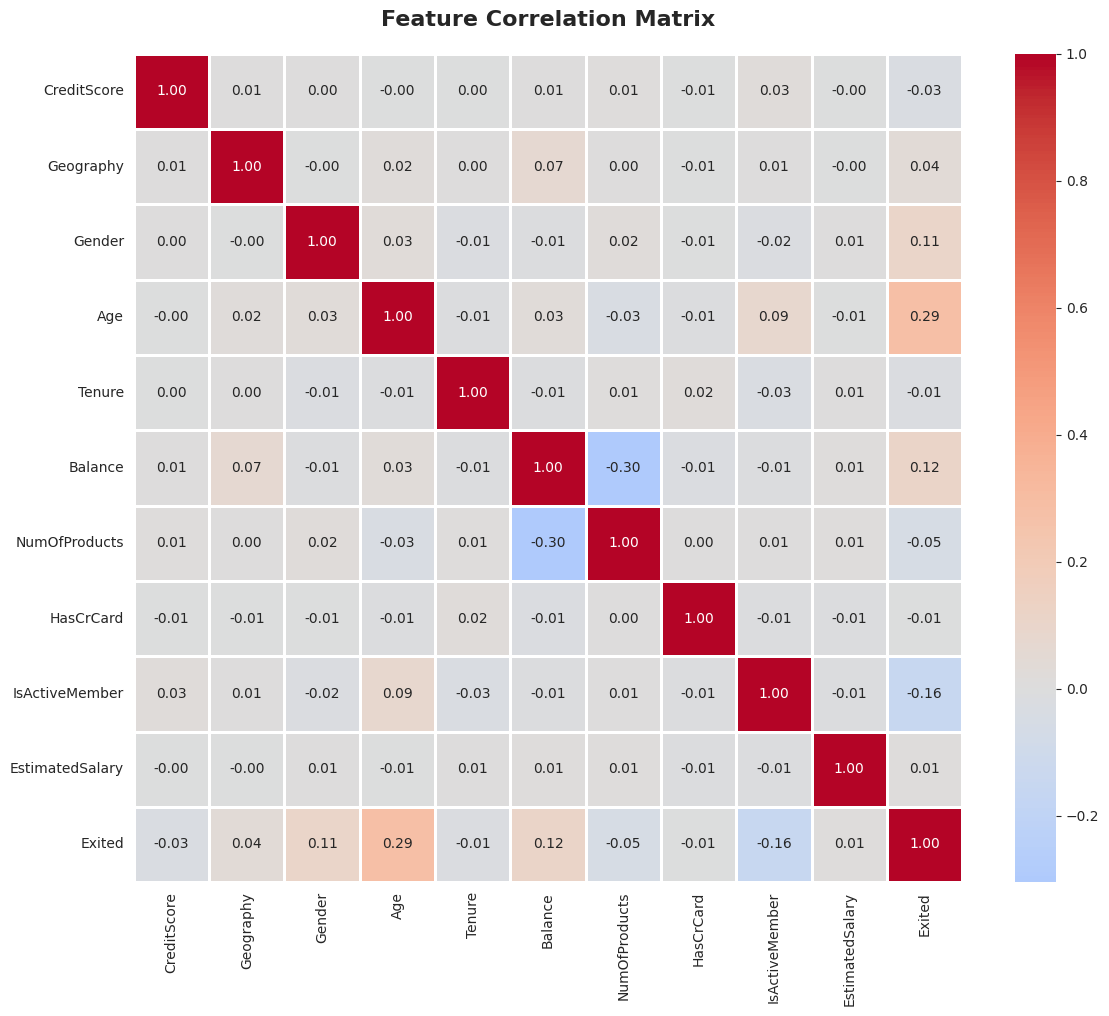


Top Correlations with Churn (Exited):
Exited             1.000000
Age                0.285323
Balance            0.118533
Gender             0.106512
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

⚠️ KEY CORRELATIONS:
   - Age: 0.285 (positive)
   - Balance: 0.119 (positive)
   - Gender: 0.107 (positive)
   - Geography: 0.036 (positive)
   - EstimatedSalary: 0.012 (positive)
   - HasCrCard: -0.007 (negative)
   - Tenure: -0.014 (negative)
   - CreditScore: -0.027 (negative)
   - NumOfProducts: -0.048 (negative)
   - IsActiveMember: -0.156 (negative)


In [30]:
df_encoded = df.copy()
df_encoded['Geography'] = df_encoded['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Drop the BalanceGroup column before calculating correlation as it contains string labels
# and is not suitable for direct numerical correlation.
if 'BalanceGroup' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['BalanceGroup'])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Visualization 9: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('Resources/09_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with Exited
print("\nTop Correlations with Churn (Exited):")
churn_correlations = correlation_matrix['Exited'].sort_values(ascending=False)
print(churn_correlations)

print(f"\n⚠️ KEY CORRELATIONS:")
for feature in churn_correlations.index:
    if feature != 'Exited':
        corr_value = churn_correlations[feature]
        direction = "positive" if corr_value > 0 else "negative"
        print(f"   - {feature}: {corr_value:.3f} ({direction})")

# 3.6 MULTIVARIATE ANALYSIS


Churn Rate by Geography and Gender:
Gender        Female       Male
Geography                      
France     20.344980  12.713404
Germany    37.552389  27.811550
Spain      21.212121  13.112392


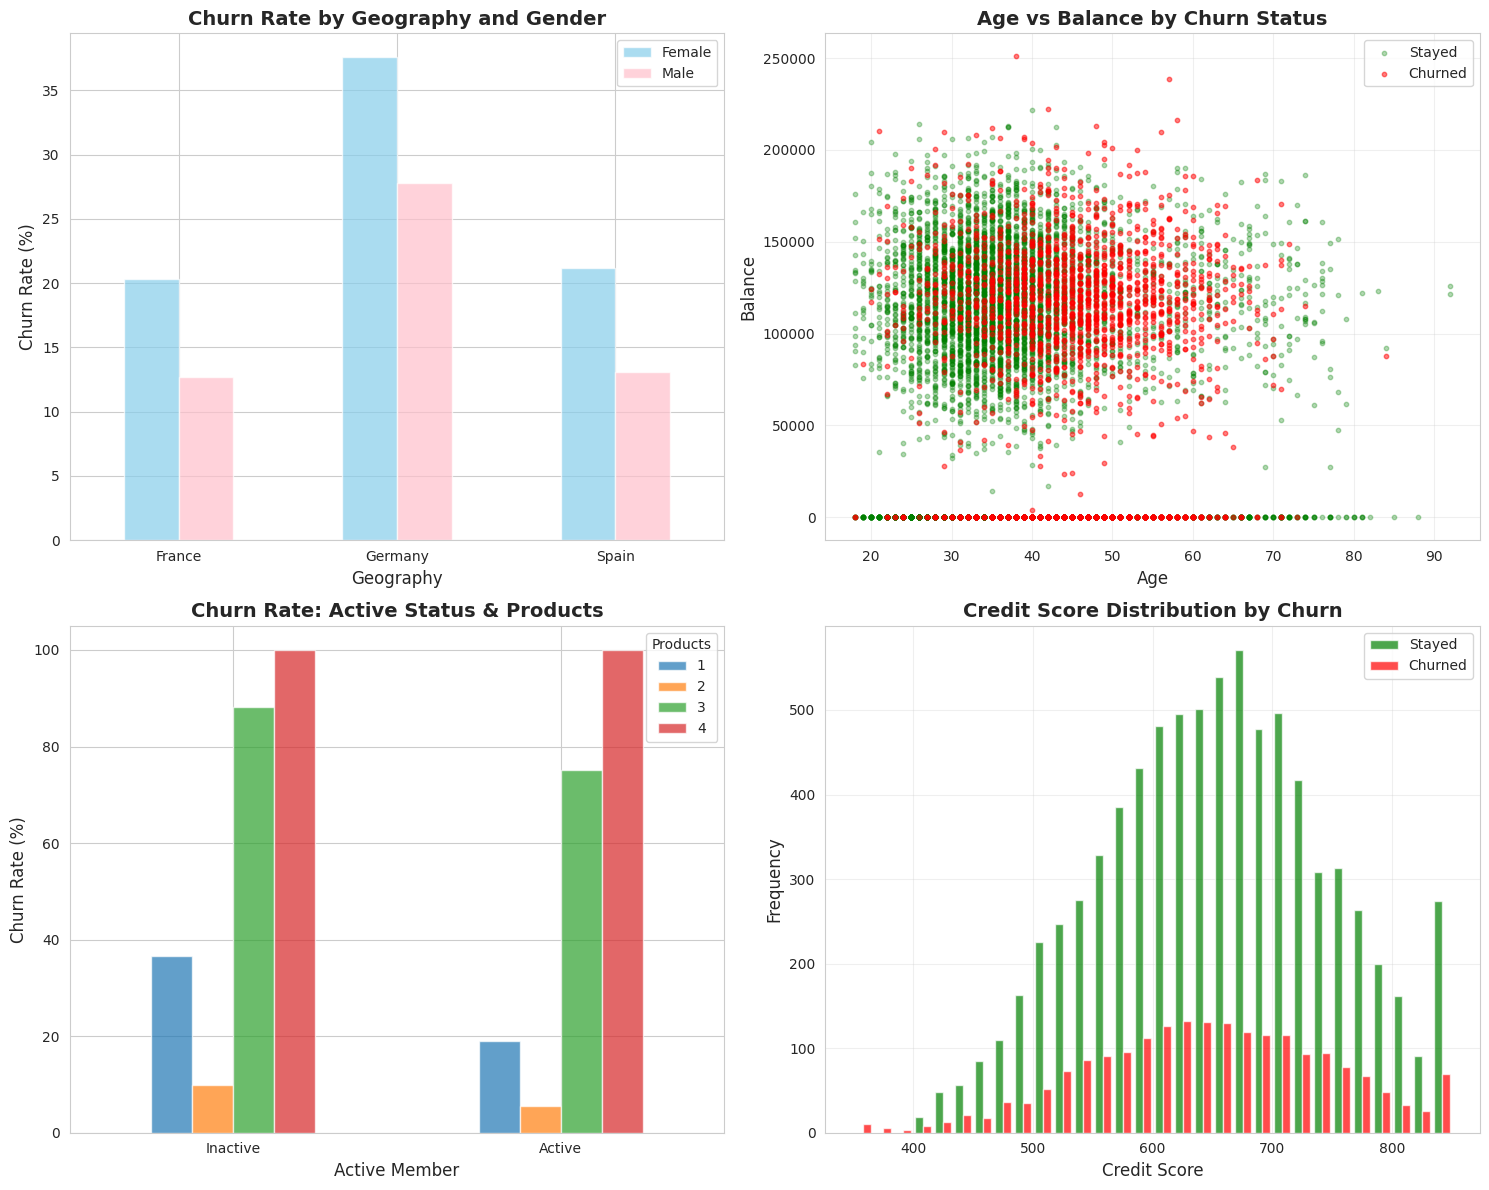


EXPLORATORY DATA ANALYSIS COMPLETED!

Key Takeaways:
1. Dataset is imbalanced (80/20 split) - requires SMOTE
2. Female customers churn more than males
3. German customers have highest churn rate
4. Older customers (45+) more likely to churn
5. Inactive members churn significantly more
6. Having 3-4 products increases churn risk dramatically
7. Age and Geography are strong predictors


In [32]:
geo_gender_churn = df.groupby(['Geography', 'Gender'])['Exited'].mean() * 100

print("\nChurn Rate by Geography and Gender:")
print(geo_gender_churn.unstack())

# Visualization 10: Multivariate
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Geography + Gender
geo_gender_churn.unstack().plot(kind='bar', ax=axes[0, 0], color=['skyblue', 'pink'], alpha=0.7)
axes[0, 0].set_title('Churn Rate by Geography and Gender', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0, 0].set_xlabel('Geography', fontsize=12)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].legend(['Female', 'Male'])

# Age vs Balance (scatter)
axes[0, 1].scatter(stayed['Age'], stayed['Balance'], alpha=0.3, label='Stayed', color='green', s=10)
axes[0, 1].scatter(churned['Age'], churned['Balance'], alpha=0.5, label='Churned', color='red', s=10)
axes[0, 1].set_title('Age vs Balance by Churn Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age', fontsize=12)
axes[0, 1].set_ylabel('Balance', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Active Member + Products
active_products = df.groupby(['IsActiveMember', 'NumOfProducts'])['Exited'].mean() * 100
active_products.unstack().plot(kind='bar', ax=axes[1, 0], alpha=0.7)
axes[1, 0].set_title('Churn Rate: Active Status & Products', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1, 0].set_xlabel('Active Member', fontsize=12)
axes[1, 0].set_xticklabels(['Inactive', 'Active'], rotation=0)
axes[1, 0].legend(title='Products', labels=['1', '2', '3', '4'])

# Credit Score distribution
axes[1, 1].hist([stayed['CreditScore'], churned['CreditScore']], bins=30,
                label=['Stayed', 'Churned'], color=['green', 'red'], alpha=0.7)
axes[1, 1].set_title('Credit Score Distribution by Churn', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Credit Score', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Resources/10_multivariate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS COMPLETED!")
print("="*80)
print("\nKey Takeaways:")
print("1. Dataset is imbalanced (80/20 split) - requires SMOTE")
print("2. Female customers churn more than males")
print("3. German customers have highest churn rate")
print("4. Older customers (45+) more likely to churn")
print("5. Inactive members churn significantly more")
print("6. Having 3-4 products increases churn risk dramatically")
print("7. Age and Geography are strong predictors")